In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# อ่านข้อมูลใส่ลงใน df
df=pd.read_csv('height_weight.csv')
df.shape

(10000, 3)

In [3]:
df

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [23]:
df.describe()

,height,weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


# Plot histogram

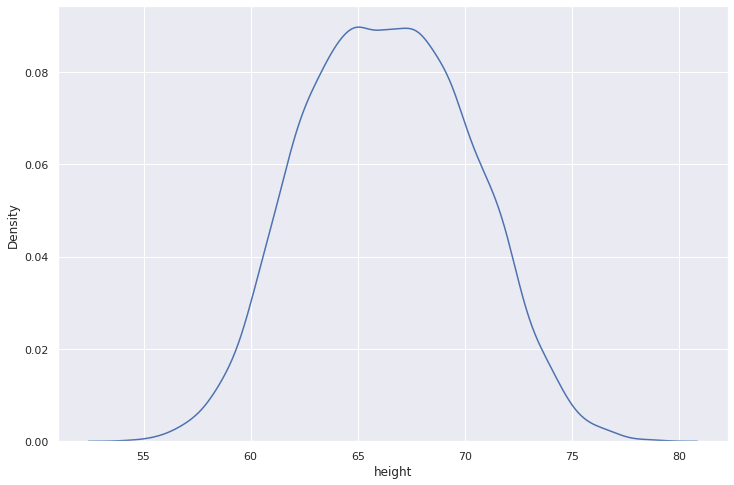

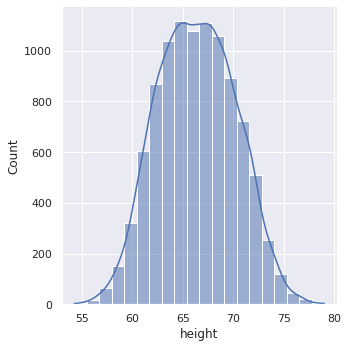

In [4]:
sns.set(rc={'figure.figsize':(12,8)})
sns.kdeplot(df['height'])
sns.displot(df['height'],kde=True, bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


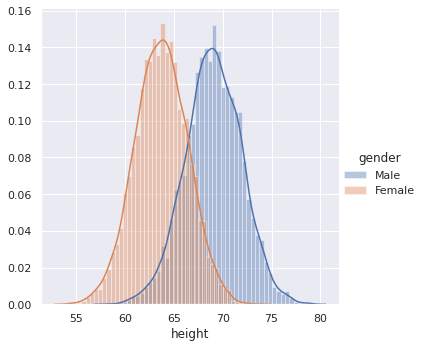

In [24]:
# แสดงกราฟ histogram เพื่อดูแนวโน้มความสัมพันธ์ของตัวแปร height แบ่งตามเพศ
sns.FacetGrid(df,hue='gender',height = 5)\
 .map(sns.distplot,'height')\
 . add_legend();
plt.show()

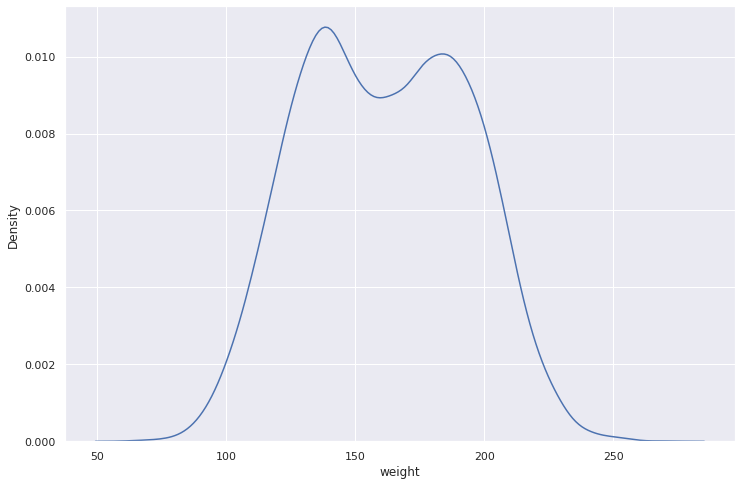

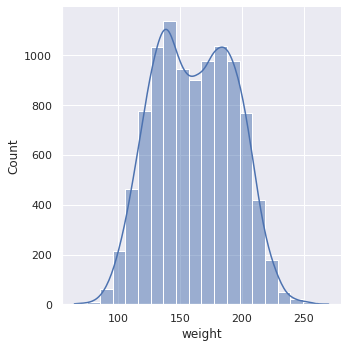

In [5]:
sns.set(rc={'figure.figsize':(12,8)})
sns.kdeplot(df['weight'])
sns.displot(df['weight'],kde=True, bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


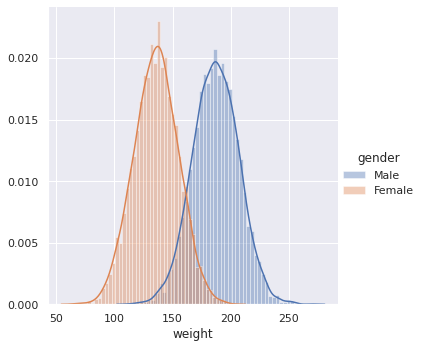

In [25]:
# แสดงกราฟ histogram เพื่อดูแนวโน้มความสัมพันธ์ของตัวแปร weight แบ่งตามเพศ
sns.FacetGrid(df,hue='gender',height = 5)\
 .map(sns.distplot,'weight')\
 . add_legend();
plt.show()

# Outliers

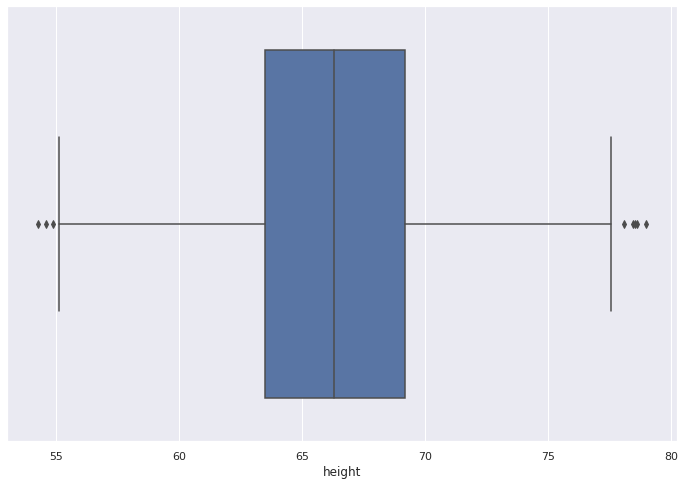

In [6]:
sns.boxplot(x='height', data=df)

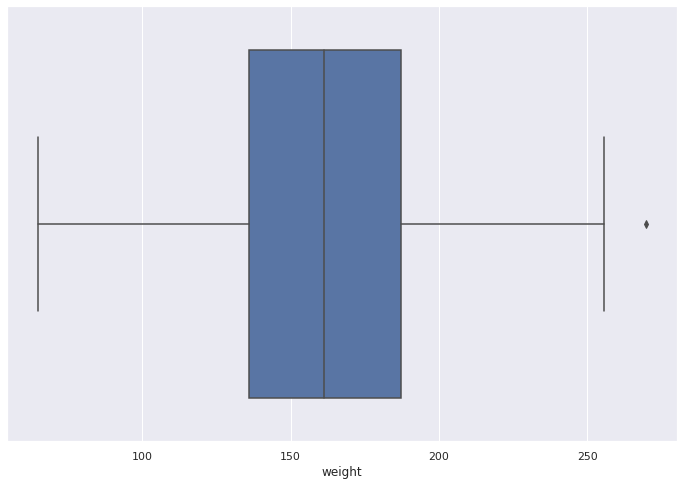

In [7]:
sns.boxplot(x='weight', data=df)

In [8]:
# IQR 

q1 = df.quantile(0.25) # เลือกค่าที่เป็นจุดของ Q1
q3 = df.quantile(0.75) # เลือกค่าที่เป็นจุดของ Q3
iqr = q3 - q1
iqr

height     5.668641
weight    51.351474
dtype: float64

In [9]:
# คำนวณหาค่า lower outliers และ upper outliers
low_outlier = q1-1.5*iqr
upp_outlier = q3+1.5*iqr

In [10]:
# แสดงค่า lower outliers
low_outlier

height    55.002659
weight    58.790841
dtype: float64

In [11]:
# แสดงค่า upper outliers
upp_outlier

height     77.677224
weight    264.196735
dtype: float64

In [20]:
# แสดงค่าข้อมูลที่มีค่า height เกินขอบเขต lower outliers
df_height_low = df[df['height'] <= low_outlier['height']]
df_height_low

,gender,height,weight
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [19]:
# แสดงค่าข้อมูลที่มีค่า height เกินขอบเขต upper outliers
df_height_upp = df[df['height'] >= upp_outlier['height']]
df_height_upp

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


In [21]:
# แสดงค่าข้อมูลที่มีค่า weight เกินขอบเขต lower outliers
df_weight_low = df[df['weight'] <= low_outlier['weight']]
df_weight_low

,gender,height,weight


In [22]:
# แสดงค่าข้อมูลที่มีค่า weight เกินขอบเขต upper outliers
df_weight_upp = df[df['weight'] >= upp_outlier['weight']]
df_weight_upp

,gender,height,weight
2014,Male,78.998742,269.989699
